In [90]:
%matplotlib inline

In [91]:
import numpy as np
import pylab
import pandas
from scipy.spatial.distance import euclidean
from collections import OrderedDict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor

import matplotlib as mpl
import matplotlib.pyplot as plt

SAMPLE_COUNT = 1000
DIMENSIONS = 1, 2, 4, 8, 16, 32

In [92]:
# Generate Samples
SAMPLES = OrderedDict()
for p in DIMENSIONS:
    SAMPLES[p] = [np.random.random(p) for i in xrange(SAMPLE_COUNT)]

In [93]:
# Calculate Y values
A_VAL = 0.97
Y_VALUES = OrderedDict()
for p in DIMENSIONS:
    Y_VALUES[p] = []
    zero_array = np.zeros(p, dtype=np.float)
    for i in xrange(SAMPLE_COUNT):
        e_dist = euclidean(SAMPLES[p][i], zero_array)
        y_val = np.exp((-A_VAL) * e_dist)
        Y_VALUES[p].append(y_val)
    
#     break
print min(Y_VALUES[1]), max(Y_VALUES[1])
print min(Y_VALUES[2]), max(Y_VALUES[2])
print min(Y_VALUES[4]), max(Y_VALUES[4])
print min(Y_VALUES[8]), max(Y_VALUES[8])
print min(Y_VALUES[16]), max(Y_VALUES[16])
print min(Y_VALUES[32]), max(Y_VALUES[32])

0.379295403237 0.999835368054
0.262432071316 0.960405581637
0.165476545328 0.829644181314
0.102093638917 0.562151952908
0.0570666659292 0.313014962181
0.0169490136103 0.118842824299


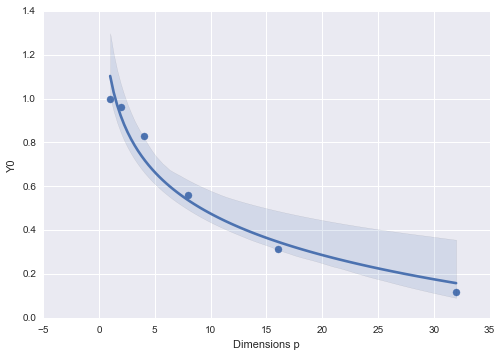

In [109]:
PREDICT_VALS = {}
for p in DIMENSIONS:
    nn = KNeighborsRegressor(n_neighbors=1,)
    nn.fit(SAMPLES[p], Y_VALUES[p])
    dir(nn)
    PREDICT_VALS[p] = nn.predict([np.zeros(p)])
ERRORS = {p:1-y for p,y in PREDICT_VALS.items()}
ERROR = ERRORS[1][0]
df= pandas.DataFrame([[k,v[0]] for k,v in PREDICT_VALS.items()], columns=["Dimensions p", "Y0"])
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x="Dimensions p", y="Y0", data=df, x_estimator=np.mean, logx=True, truncate=True)

In [133]:
err = 1
err_1_100 = 0.02676521
SIM_100 = {}
for p in 1,2,4,8,16,32:
    zero_array = np.zeros(p, dtype=np.float)
    count = 10
    err = 1
    while err > err_1_100:
        if count > 100000:
            break
        count += 2**p
        samples = [np.random.random(p) for i in xrange(count)]
        y_values = []
        for i in xrange(count):
            e_dist = euclidean(samples[i], zero_array)
            y_val = np.exp((-A_VAL) * e_dist)
            y_values.append(y_val)

        nn = KNeighborsRegressor(n_neighbors=1,)
        nn.fit(samples, y_values)
        predict_val = nn.predict([np.zeros(p)])
        err = 1- predict_val
        SIM_100[p] = count
    print(p, count, err)

(1, 18, array([ 0.0023224]))
(2, 54, array([ 0.02312087]))


KeyboardInterrupt: 